# Capstone Project - The Japanese inbound market

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Analysis & Insights](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The Japanese inbound travel market is growing faster and bigger. This is a good opportunity!
But there are always limited resources. We should determine which areas and countries are growing faster in order to concentrate on those areas.
In order to determine the areas, we should predict inbound marketing for 2020 based on data and machine learning.

These data and predictions will help those who are thinking about challenging the Japanese inbound market but are suffering from limited resources.

## Data <a name="data"></a>

Japan National Tourism Organization (JNTO)
Every month, JNTO publishes data about the monthly number of visitors to Japan by country of origin.

So, I will collect data (I will scrap the website, if needed) to make decisions about Japanese inbound travel marketing.

I downloaded data from below url <br>
https://www.jnto.go.jp/jpn/statistics/visitor_trends/index.html

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Translation

In [2]:
data = pd.DataFrame()
for name in range(2003,2020):
    name = str(name)
    temp = pd.read_excel('since2003_visitor_arrivals.xlsx', sheet_name = name, header=3, index_col=0)
    temp = temp[['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']].rename(columns={'1月': (name + '/01'),'2月': (name + '/02'),'3月': (name + '/03'),'4月': (name + '/04'),
                    '5月': (name + '/05'),'6月': (name + '/06'),'7月': (name + '/07'),'8月': (name + '/08'),
                    '9月': (name + '/09'),'10月': (name + '/10'),'11月': (name + '/11'),'12月': (name + '/12')})
    data = pd.concat([data, temp], axis=1)

In [3]:
data = data.dropna(how='all').dropna(axis=1, how='all')

In [4]:
data.index.unique()

Index(['その他アジア', 'その他オセアニア', 'その他ヨーロッパ', 'その他北アメリカ', 'その他南アメリカ', 'アイルランド',
       'アジア計', 'アフリカ計', 'イスラエル', 'イタリア', 'インド', 'インドネシア', 'オセアニア計', 'オランダ',
       'オーストリア', 'カナダ', 'シンガポール', 'スイス', 'スウェーデン', 'スペイン', 'タイ', 'デンマーク',
       'トルコ', 'ドイツ', 'ニュージーランド', 'ノルウェー', 'フィリピン', 'フィンランド', 'フランス', 'ブラジル',
       'ベトナム', 'ベルギー', 'ポルトガル', 'ポーランド', 'マカオ', 'マレーシア', 'メキシコ', 'モンゴル',
       'ヨーロッパ計', 'ロシア', '中国', '北アメリカ計', '南アメリカ計', '台湾', '無国籍・その他', '米国', '総数',
       '英国', '豪州', '韓国', '香港'],
      dtype='object')

In [5]:
data = data.drop(['北アメリカ計', '南アメリカ計','アジア計', 'アフリカ計', 'オセアニア計', '総数','ヨーロッパ計'],axis=0)

In [6]:
data = data.rename(index={'シンガポール': 'Singapore','スイス': 'Swiss','スウェーデン': 'Sweden','スペイン': 'Spain',
                     'アイルランド': 'Ireland','イスラエル': 'Israel','イタリア': 'Italy','インド': 'India',
                    'インドネシア': 'Indonesia','オランダ': 'Netherlands','オーストリア': 'Austria','カナダ': 'Canada',
                    'タイ': 'Thailand','デンマーク': 'Denmark','トルコ': 'Turkey','ドイツ': 'Germany',
                    'ニュージーランド': 'Newzealand','ノルウェー': 'Norway','フィリピン': 'Philippines','フィンランド': 'Finland',
                    'フランス': 'France','ブラジル': 'Brazil','ベトナム': 'Vietnam','ベルギー': 'Belgium',
                    'メキシコ': 'Mexico','モンゴル': 'Mongolia','ロシア': 'Russia','中国': 'China',
                    'ポルトガル': 'Portugal','ポーランド': 'Poland','マカオ': 'Macau','マレーシア': 'Malaysia',
                    '台湾': 'Taiwan','米国': 'USA','無国籍・その他': 'Other','英国': 'UK',
                    '豪州': 'Australia','韓国': 'Korea','香港': 'Hongkong','その他アジア': 'OtherAsian',
                    'その他オセアニア': 'OtherOceania','その他ヨーロッパ': 'OtherEurope','その他北アメリカ': 'OtherN.America',
                    'その他南アメリカ': 'OtherS.America'})

### Grouping & Shaping

In [7]:
All = ['OtherAsian', 'OtherOceania', 'OtherEurope', 'OtherN.America',
       'OtherS.America', 'Ireland', 'Israel', 'Italy', 'India', 'Indonesia',
       'Netherlands', 'Austria', 'Canada', 'Singapore', 'Swiss', 'Sweden',
       'Spain', 'Thailand', 'Denmark', 'Turkey', 'Germany', 'Newzealand',
       'Norway', 'Philippines', 'Finland', 'France', 'Brazil', 'Vietnam',
       'Belgium', 'Portugal', 'Poland', 'Macau', 'Malaysia', 'Mexico',
       'Mongolia', 'Russia', 'China', 'Taiwan', 'Other', 'USA', 'UK',
       'Australia', 'Korea', 'Hongkong']
Asian = ['OtherAsian','Israel','India', 'Indonesia','Singapore', 'Thailand', 'Turkey','Philippines','Vietnam', 'Macau', 'Malaysia',
       'Mongolia', 'China', 'Taiwan','Korea', 'Hongkong']
North_America = ['OtherN.America','Canada','Mexico', 'USA']
Europe=['OtherEurope', 'Ireland', 'Italy','Netherlands', 'Austria', 'Swiss', 'Sweden',
       'Spain', 'Denmark', 'Germany','Norway', 'Finland', 'France', 'Belgium', 'Portugal','Poland','UK','Russia']
Oceania = ['OtherOceania', 'Newzealand', 'Australia']
South_America = ['OtherS.America','Brazil']

In [8]:
df = data.T
df = df.reset_index()

In [9]:
df['date'] = pd.to_datetime(df['index'])
df["year"] = df['date'].dt.year
df["month"] = df['date'].dt.month

In [10]:
data_new = pd.DataFrame(columns=['country','date','year','month','amount'])
for area in All:
    temp = df[['date','year','month',area]]
    temp['country'] = area
    temp = temp.rename({area:'amount'},axis=1)
    data_new = pd.concat([data_new, temp], axis=0)

In [11]:
for area in Asian:
    data_new.loc[data_new['country'] == area,'Area'] = 'Asian'
for area in North_America:
    data_new.loc[data_new['country'] == area,'Area'] = 'North_America'
for area in Europe:
    data_new.loc[data_new['country'] == area,'Area'] = 'Europe'
for area in South_America:
    data_new.loc[data_new['country'] == area,'Area'] = 'South_America'
for area in Oceania:
    data_new.loc[data_new['country'] == area,'Area'] = 'Oceania'

In [12]:
data_new = data_new[['country','date','year','month','amount','Area']]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8712 entries, 0 to 197
Data columns (total 6 columns):
country    8712 non-null object
date       8712 non-null datetime64[ns]
year       8712 non-null object
month      8712 non-null object
amount     7572 non-null float64
Area       8514 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 476.4+ KB


In [13]:
data_new.head()

,country,date,year,month,amount,Area
0,OtherAsian,2003-01-01,2003,1,NaN,Asian
1,OtherAsian,2003-02-01,2003,2,NaN,Asian
2,OtherAsian,2003-03-01,2003,3,NaN,Asian
3,OtherAsian,2003-04-01,2003,4,NaN,Asian
4,OtherAsian,2003-05-01,2003,5,NaN,Asian


---

#### Check overall by graph

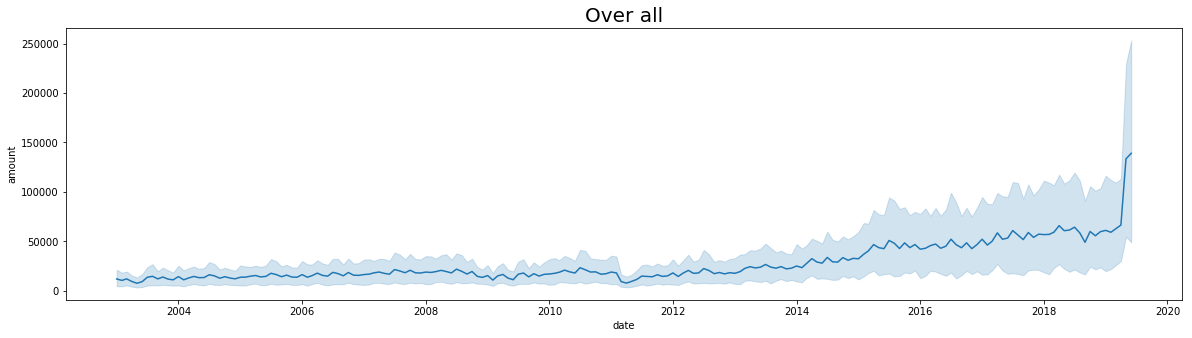

In [14]:
plt.figure(figsize=(20, 5))
plt.title('Over all',fontsize=20)
sns.lineplot(data= data_new, x='date', y='amount')

It seems there was a big drop in 2011. So, I searched about what happened in 2011 in Japan. And there was a nuclear disaster in March 2011.

---

### Fukushima Daiichi nuclear disaster
https://en.wikipedia.org/wiki/Fukushima_Daiichi_nuclear_disaster

#### details

"Fukushima nuclear disaster" redirects here. For the incidents at Fukushima Daini, see Fukushima Daini Nuclear Power Plant.
"2011 Japanese nuclear accidents" redirects here. For other 2011 Japanese nuclear accidents/incidents, see Fukushima Daini Nuclear Power Plant, Onagawa Nuclear Power Plant, Tōkai Nuclear Power Plant, and Rokkasho Reprocessing Plant.

---

Because of the outlying data, I think the Japanese inbound market should be separated before and after the Fukushima Daiichi nuclear disaster. So I am only going to use data after March 2011.

In [15]:
data_2011 = data_new[(data_new['date'] >= '2011-03') & (data_new['date'] <= '2019-04')]

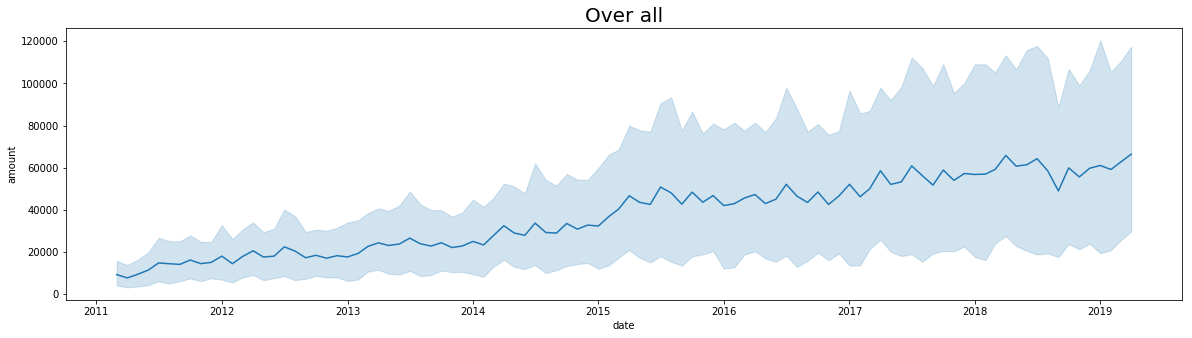

In [16]:
plt.figure(figsize=(20, 5))
plt.title('Over all',fontsize=20)
sns.lineplot(data= data_2011, x='date', y='amount')

The cleaned data will be used to analyze and to do machine learning.

#### Machine learning for 2020 prediction

In [17]:
test = data_new[(data_new['date'] >= '2017') & (data_new['date'] < '2019')]
test['year'] = test['year'] + 2
test['day'] = 1
test['date'] = pd.to_datetime(test[['year', 'month','day']])
test.drop('day', axis=1, inplace=True)
test["amount"] = np.nan

In [18]:
test = test.drop(test[(test['year']== 2019) & ((test['month']== 1) | (test['month']==2)| (test['month']==3)| (test['month']==4))].index)

In [19]:
feature = ["year", "month"]
label = 'amount'
x_train = data_2011[feature]
x_test = test[feature]
y_train = data_2011[label]

In [20]:
model = RandomForestRegressor(n_estimators=5000, n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
train = data_2011.drop('Area',axis=1).dropna()

In [22]:
for area in All:
    model.fit(train[train['country'] == area][feature], train[train['country'] == area][label])
    test.loc[test['country'] == area, label] = model.predict(test[test['country'] == area][feature])

In [23]:
trained = pd.concat([data_2011, test], axis=0)

## Analysis & Insights <a name="analysis"></a>

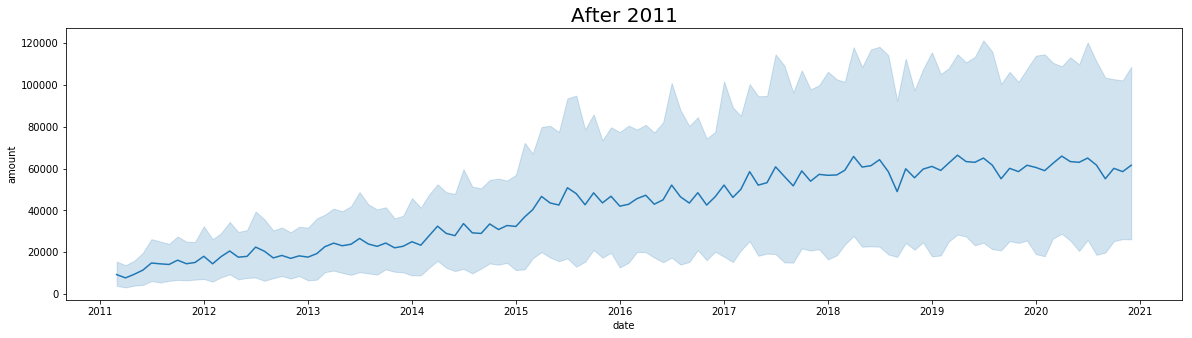

In [24]:
plt.figure(figsize=(20, 5))
plt.title('After 2011',fontsize=20)
sns.lineplot(data = trained, x = 'date', y= 'amount')

* Based on the results of machine learning, there is not as big of growth in 2020 as I thought.

Let's check the data when separated by area.

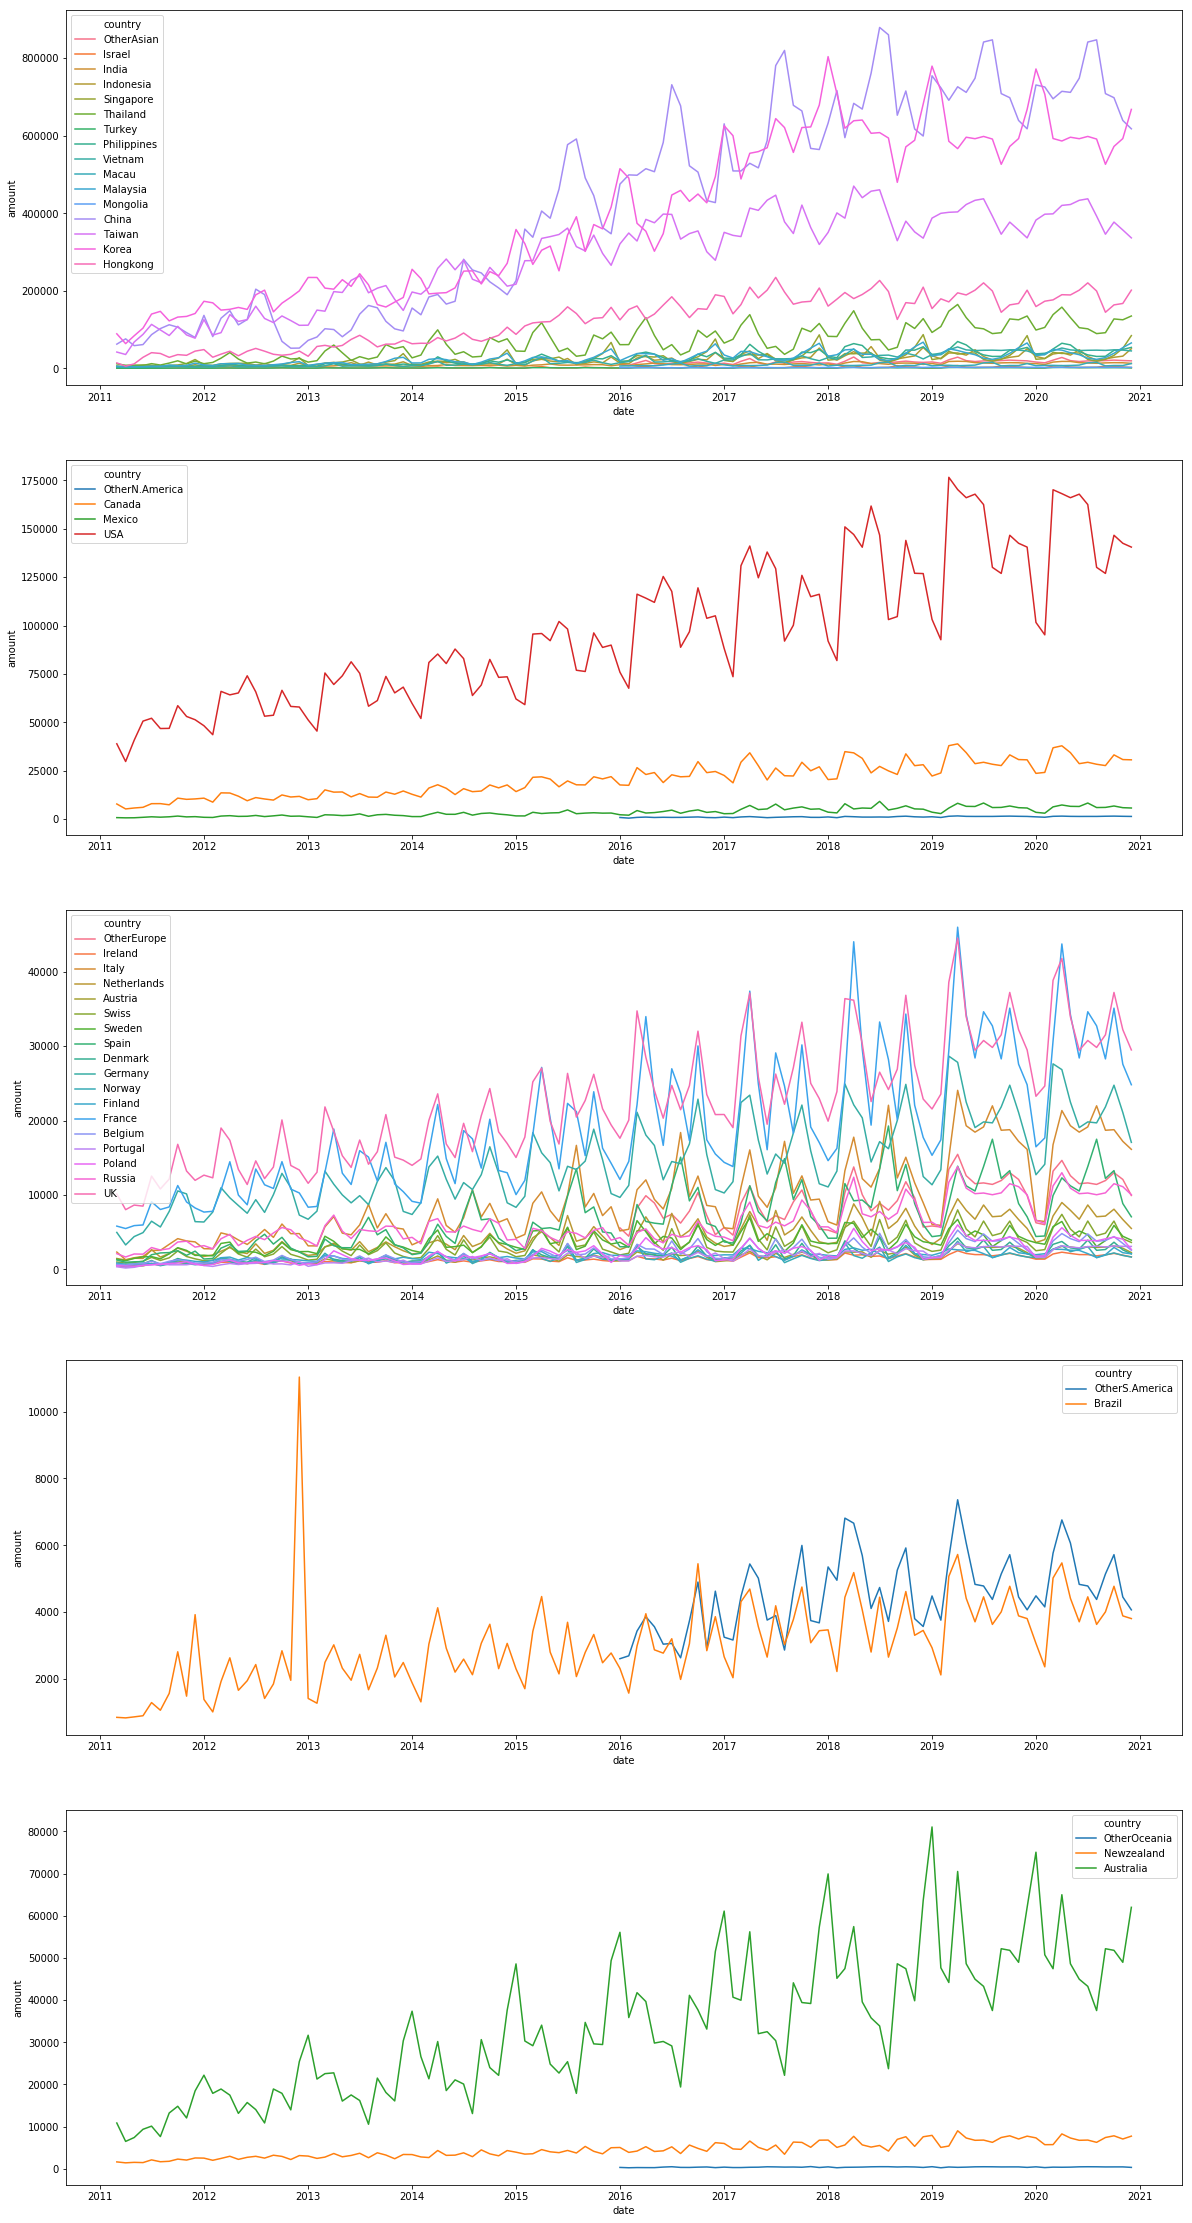

In [25]:
figure, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(20, 40)
sns.lineplot(data=trained[trained['Area']=='Asian'], x="date", y="amount",hue='country', ax=ax1)
sns.lineplot(data=trained[trained['Area']=='North_America'], x="date", y="amount",hue='country', ax=ax2)
sns.lineplot(data=trained[trained['Area']=='Europe'], x="date", y="amount",hue='country', ax=ax3)
sns.lineplot(data=trained[trained['Area']=='South_America'], x="date", y="amount",hue='country', ax=ax4)
sns.lineplot(data=trained[trained['Area']=='Oceania'], x="date", y="amount",hue='country', ax=ax5)

* Depending on the month, there are characteristics and patterns.
* In December 2012, Brazilians traveled to Japan a lot, but I could not find an explanation.

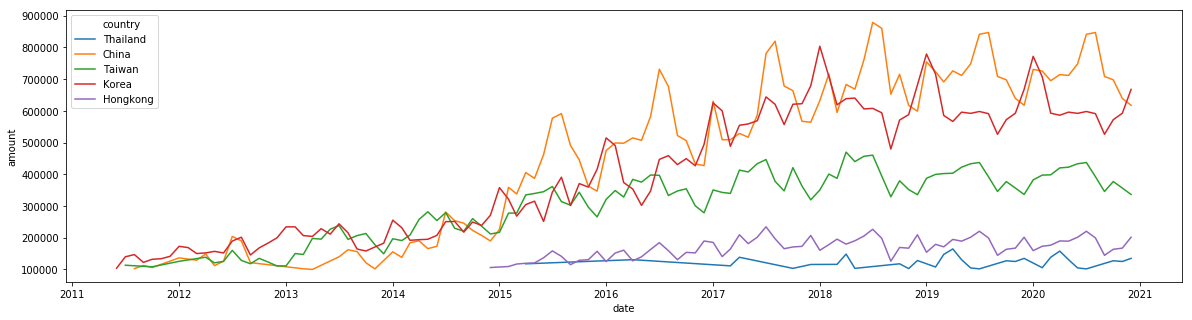

In [26]:
plt.figure(figsize=(20, 5))
sns.lineplot(data = trained[(trained['Area']=='Asian')&(trained['amount'] > 100000)],
             x = 'date', y= 'amount',hue='country')

* Nearby countries such as South Korea, China, etc. grew the most.

In [27]:
trained_group = trained.groupby([trained['country'],trained['year']]).sum().reset_index()

In [28]:
trained_group['growth'] = 0

In [29]:
for n in range(1,440):
    trained_group.iloc[n,3] = trained_group.iloc[n,2] / trained_group.iloc[n-1,2] * 100

In [30]:
trained_group = trained_group.drop(trained_group[trained_group['year'] != 2020].index)

In [31]:
trained_group = trained_group.sort_values('growth', ascending = False)

In [32]:
top5 = trained_group.head(5)

In [33]:
top5

,country,year,amount,growth
249,Other,2020,658.5564,100.542440
149,Israel,2020,43926.4992,100.425904
319,Poland,2020,44672.5776,100.378401
369,Sweden,2020,54412.7938,100.313963
39,Brazil,2020,48620.6692,100.146803


* Israel, Sweden, and "Other" countries not specifically calculated seem to grow the most in 2020.
* The number of first-time visitors will also grow.
* The Japanese inbound market for these countries is small compared to the market for China or South Korea, but that means there are fewer competitors for businesses looking to appeal to these visitors.

## Results and Discussion <a name="results"></a>

### Target the big market and winner

In [34]:
trained_group.loc[(trained_group['country'] == 'Korea') | (trained_group['country'] == 'China')| 
                  (trained_group['country'] == 'Taiwan')| (trained_group['country'] == 'Hongkong')]

,country,year,amount,growth
169,Korea,2020,7.394618e+06,100.146053
389,Taiwan,2020,4.700749e+06,100.115542
109,Hongkong,2020,2.187686e+06,99.973595
59,China,2020,8.677690e+06,99.660076


If you have many resorces (like money or money) then you should target China or South Korea, etc. Those countries the Japanese inbound market is not growing much or decreasing little, But still those countries are the biggest the Japnese inbound market.

### Long tail strategy

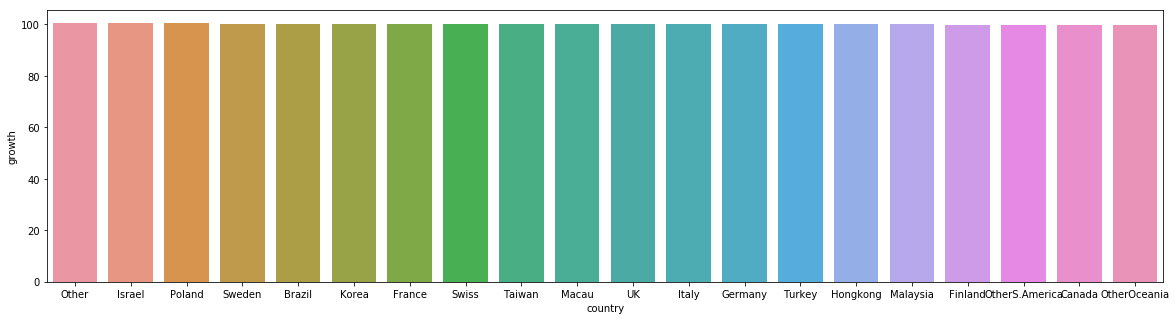

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(data=trained_group.head(20), x='country', y='growth')

If you don't have enough resources and you are watching for blue ocean market in Japanese inbound market, targeting the above countries will be good choice.

## Conclusion <a name="conclusion"></a>

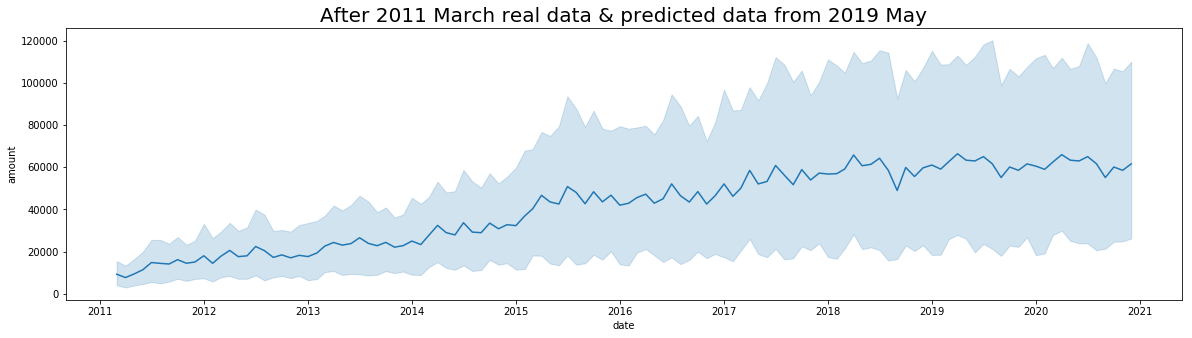

In [36]:
plt.figure(figsize=(20, 5))
plt.title('After 2011 March real data & predicted data from 2019 May',fontsize=20)
sns.lineplot(data = trained, x = 'date', y= 'amount')

I think the travel market is one of the most unpredictable market. Especially The Japanese inbound travel market.

And Japanese inbound travel market is much more difficult. (probably not only Japan, all of East Asia)

Below events are good example of why the travel market is unpredictable because of disaster, political issues, global big events.

---

### 2012 China anti-Japanese demonstrations
https://en.wikipedia.org/wiki/2012_China_anti-Japanese_demonstrations

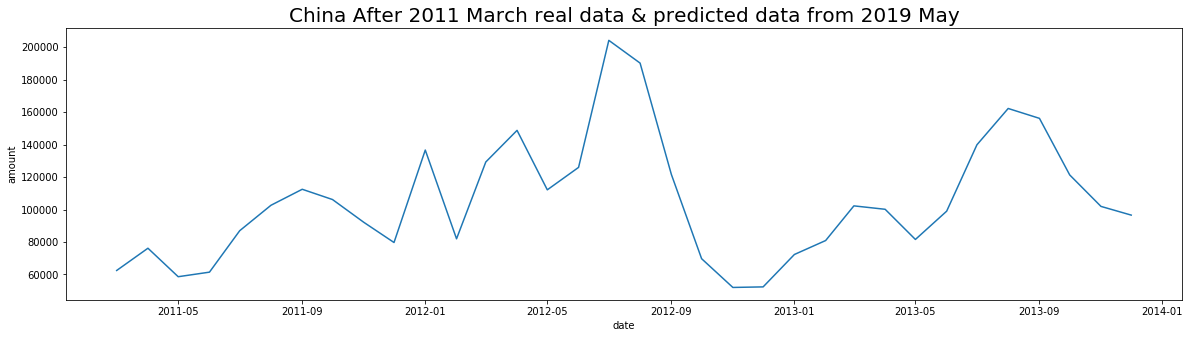

In [37]:
plt.figure(figsize=(20, 5))
plt.title('China After 2011 March real data & predicted data from 2019 May',fontsize=20)
sns.lineplot(data = trained[(trained['country']=='China') & (trained['date'] > '2011') & (trained['date'] < '2014')], x = 'date', y= 'amount')

It isn't hard to know that there is huge drop on 2012 fall.

#### details

The China anti-Japanese demonstrations of 2012 were a series of demonstrations held across major cities in China and Taiwan[1] during August and September 2012. The main cause of the demonstrations was the escalation of the Senkaku Islands dispute (Senkaku islands known as Diaoyu in China) between China and Japan around the time of the anniversary of the "Mukden Incident of 1931, which was the de facto catalyst to the Japanese invasion of Manchuria, culminating in a humiliating Chinese defeat and a decisive Japanese victory vis-à-vis total consolidation and annexation of Manchuria. Protesters in several cities later became violent and local authorities began arresting demonstrators and banning the demonstrations.

### 2018 Osaka earthquake
https://en.wikipedia.org/wiki/2018_Osaka_earthquake

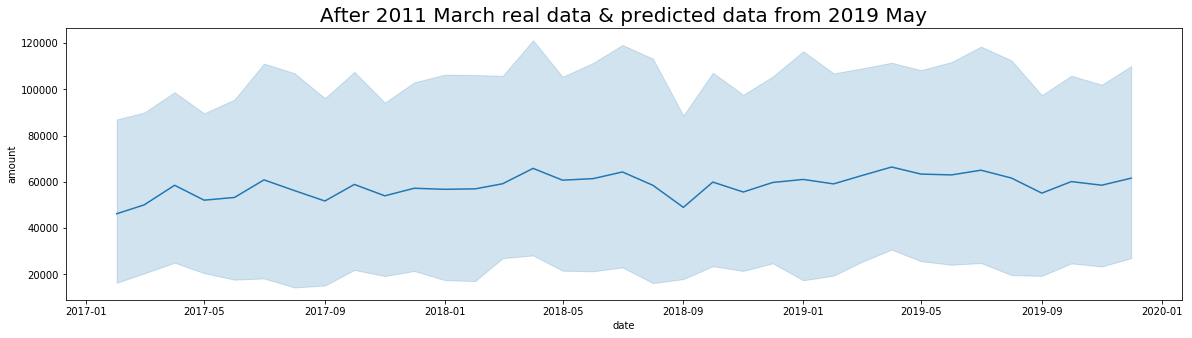

In [38]:
plt.figure(figsize=(20, 5))
plt.title('After 2011 March real data & predicted data from 2019 May',fontsize=20)
sns.lineplot(data = trained[(trained['date'] > '2017') & (trained['date'] < '2020')], x = 'date', y= 'amount')

Also, there was drop on June 2018

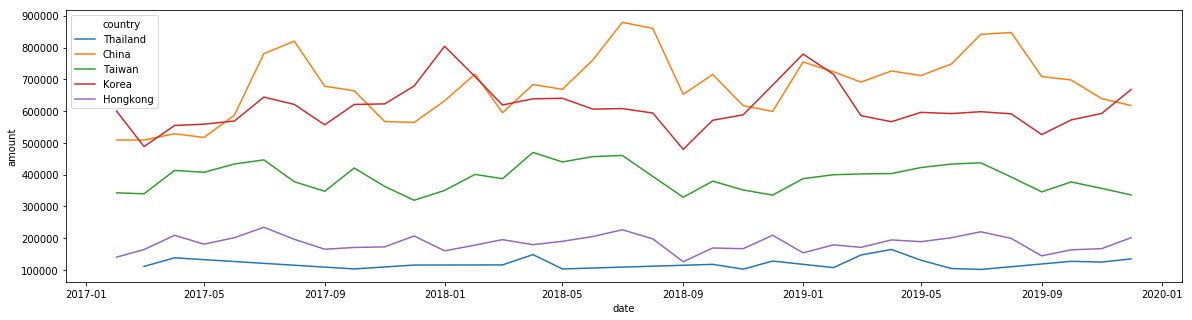

In [39]:
plt.figure(figsize=(20, 5))
sns.lineplot(data = trained[(trained['Area']=='Asian') & (trained['date'] > '2017') & (trained['date'] < '2020')& (trained['amount'] > 100000)], x = 'date', y= 'amount',hue='country')

Especially, There was huge drop in nearby country like China, South Korea, Taiwan etc.

#### details

On 18 June 2018, around 7:58 a.m. Japan Standard Time, an earthquake measuring 5.6 Mw on the moment magnitude scale (preliminary 5.5 Mw) struck in northern Osaka Prefecture, Japan. The earthquake's epicenter was near Takatsuki and occurred at a depth of approximately 13 kilometres (8.1 mi). The Japan Meteorological Agency registered a magnitude of 6.1 Mj and an intensity of lower 6 on the shindo scale.

### 2020 Summer Olympics
https://en.wikipedia.org/wiki/2020_Summer_Olympics

The 2020 Summer Olympics, officially known as the Games of the XXXII Olympiad (Japanese: 第三十二回オリンピック競技大会 Hepburn: Dai Sanjūni-kai Orinpikku Kyōgi Taikai)[1] and commonly known as Tokyo 2020, is an upcoming international multi-sport event that is scheduled to take place from 24 July to 9 August 2020 in Tokyo, Japan, with preliminary events in some sports beginning on 22 July.

<div style="text-align: right">All of above data are based on Wikipedia</div>

---

Eventhough the travel market and the Japanese inbound market is unpredictable (I heard there is political frustrations between Japan and South Korea which is one of the biggest market in The Japan inbound market and it is impacting to travel market), there is no doubt that they are growing faster and there is great opportunity.

So I am trying to make unpredictable travel market to predictable and strategize the most effective marketing strategy.

I know that their data are not all of data I can collect and use. So I am gonna try harder to collect more useful data.

Please review my report and If you have some comments or useful and know where data are, Please contact me (hajae8378@gmail.com)!

Thank you!